## Spam vs. Ham

Целью данного задания является научится отличать письма со спамом 

**Задача 1 (2 балла). Чтение данных ** 

Прочитайте данные из файла spam.csv используя средства модуля [pandas](https://pandas.pydata.org/). В первом столбце пометка о роде письма (spam/ham). Будем считать, что все письма с пометкой spam лежать в первом классе, а остальные в нулевом. Во второй колонке текст сообщения. Отобразите таблицу в следующем виде
![example](table_example.png)

In [1]:
import pandas as pd

In [2]:
#чтение
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')[['v2','v1']]

#переименовка колонок
df = df.rename(columns={'v1': 'class', 'v2':'text'})
df = df[['text', 'class']]

In [3]:
#проводим замену в классах
df.loc[df['class'] == 'ham', 'class'] = '0'
df.loc[df['class'] == 'spam', 'class'] = '1'
df

,text,class
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


**Задача 2 (3 балла). Предобработка ** 

Перевидите все буквы в нижний регистр. 

С помошью [регулярных выражений](https://docs.python.org/2/library/re.html) почистите текст отставляя только слова (удалите знаки припенания, а также все числа можно заменить на N и т.п.). 

Оформите это в виде функции, которая принимает на вход некоторый список текстов и возвращает, соответственно, предобработанный список текстов. 

Преобразуйте таблицу с данными, так чтобы в ней содержались предобработанные тексты (далее мы будем работать только с ними).

In [4]:
import re

In [5]:
def predobrabotka(a):
    return [re.findall(r'\w+', i.lower()) for i in a]

df['text'] = predobrabotka(df['text'])

**Задача 3 (3 балла). Формирование словаря** 

Сформируйте словарь, ключами которого являются слова встречающееся в тексте, а значениями -- колличество раз, которое они встретились в корпусе текста. 

Оформите это в виде функции, которая принимает на вход список текстов и возвращает словарь. 

Какой размер словаря вы получили?

In [6]:
def slovar(a):
    dictionary = {}
    for i in a:
        for word in i:
            dictionary.setdefault(word, 0)
            dictionary[word] += 1
    return dictionary

df_dictionary = slovar(df['text'])
print('Длина словаря -', len(df_dictionary))

Длина словаря - 8713


**Задача 4 (2 балла). Удаление стоп-слов** 

Отсортируйте слова по убыванию частоты их встречаемости в текстах. 

С помощью модуля [matplotlib.pyplot](https://matplotlib.org/api/pyplot_api.html) постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какие слова чаще всего встречаются в тексте? Значимые ли это слова? 

In [7]:
#отсортируем по убыванию
dictionary_sort = sorted(df_dictionary.items(), key=lambda x: x[1], reverse=True)
df_dictionary_sort = pd.DataFrame(data = dictionary_sort, columns=['Word', 'Quantity'])


#выберем топ-10 по частоте
top10 = dictionary_sort[:10]
df_top10 = pd.DataFrame(data = top10, columns=['Word', 'Quantity'])

In [8]:
df_top10

,Word,Quantity
0,i,3001
1,to,2242
2,you,2240
3,a,1433
4,the,1328
5,u,1192
6,and,979
7,in,898
8,is,890
9,me,802


Чаще всего встречаются местоимения, артикли, союзы и предлоги. Это не значимые слова

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

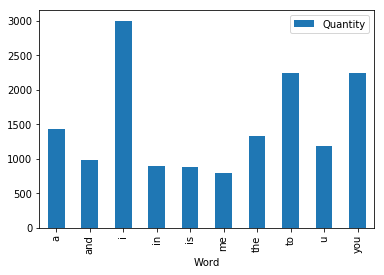

In [10]:
#нарисуем график топ-10 по алфавиту
df_top10.groupby('Word').sum().plot.bar()

**Задача 5 (5 баллов). Функциия предобработки и удаление стоп-слов. ** 

Для удаления стоп-слов можно использовать модуль [nltk](http://www.nltk.org/). Импортируйте stopwords из nltk.corpus, далее чтобы получить список английских стоп-слов нужно сделать stopwords.words('english').

Перепишите функцию предобрабитки так, чтобы она на вход принимала список текстов и список стоп-слов, чистела текст (в том числе удаляла стоп-слова), возвращала список предобработанных текстов.  

Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. 

Постройте график частот встречаемости слов в тексте. 

Распечатайте топ-10 слов и их частоты. 

Какой размер словаря вы получили теперь? Остались ли ещё высокочастотные неинформативные слова? Что это за слова? Добавте их в список стоп-слов и повторите процедуру.

In [11]:
import nltk
from nltk.corpus import stopwords 

In [12]:
stop = stopwords.words('english')
print(len(stop))

153


In [13]:
#чтение
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')[['v2','v1']]

#переименовка колонок
df = df.rename(columns={'v1': 'class', 'v2':'text'})
df = df[['text', 'class']]

In [14]:
#проводим замену в классах
df.loc[df['class'] == 'ham', 'class'] = '0'
df.loc[df['class'] == 'spam', 'class'] = '1'

In [15]:
def predobrabotka_new(a, b):
    x = [re.findall(r'\w+', i.lower()) for i in a] 
    x = [[word   for word in line if len(word) >= 3] for line in x] #почистила от неинформативных слов длиной менее 3
    return [[word   for word in line if word not in b] for line in x]


In [16]:
df['text'] = predobrabotka_new(df['text'], stop)
df

,text,class
0,"[jurong, point, crazy, available, bugis, great...",0
1,"[lar, joking, wif, oni]",0
2,"[free, entry, wkly, comp, win, cup, final, tkt...",1
3,"[dun, say, early, hor, already, say]",0
4,"[nah, think, goes, usf, lives, around, though]",0
5,"[freemsg, hey, darling, week, word, back, like...",1
6,"[even, brother, like, speak, treat, like, aids...",0
7,"[per, request, melle, melle, oru, minnaminungi...",0
8,"[winner, valued, network, customer, selected, ...",1
9,"[mobile, months, entitled, update, latest, col...",1


In [17]:
df_dictionary = slovar(df['text'])
print('Длина нового словаря -', len(df_dictionary))

Длина нового словаря - 8253


In [18]:
#отсортируем по убыванию
dictionary_sort = sorted(df_dictionary.items(), key=lambda x: x[1], reverse=True)
df_dictionary_sort = pd.DataFrame(data = dictionary_sort, columns=['Word', 'Quantity'])


#выберем топ-10 по частоте
top10 = dictionary_sort[:10]
df_top10 = pd.DataFrame(data = top10, columns=['Word', 'Quantity'])

In [19]:
df_top10

,Word,Quantity
0,call,591
1,get,391
2,free,284
3,know,261
4,like,245
5,good,245
6,got,239
7,day,229
8,come,229
9,time,220


**Задача 6 (5 баллов). Удаление низко частотных слов** 

По сформированому на предыдущем шаге словарю, посмотрите какой процент слов встречается больше одного раза. Нужны ли нам слова которые встретились только один раз? 

Преобразуйте функцию предобработки таким образом, что бы в ней, кроме всего прочего, формировался словарь и удалялись слишком редкие слова. 

Преобразуйте таблицу с данными, так чтобы в ней содержались новые предобработанные тексты (далее мы будем работать только с ними). 

Сформируйте словарь. Каков размер словаря теперь?

In [20]:
#каков процент слов, встречающихся более 1 раза

dictionary_1time = df_dictionary_sort[df_dictionary_sort['Quantity'] == df_dictionary_sort['Quantity'].min()]

print('Процент слов, встречающихся 1 раз - ', len(dictionary_1time)*100/len(df_dictionary_sort))

Процент слов, встречающихся 1 раз -  51.859929722525145


In [21]:
def predobrabotka_new_new(a, b):
    x = [re.findall(r'\w+', i.lower()) for i in a] 
    x = [[word   for word in line if len(word) >= 3] for line in x] #почистила от неинформативных слов длиной менее 3
    x = [[word   for word in line if word not in b] for line in x] #прошлась по списку стоп-слов
    slova = slovar(x)
    slova_more1 = [key for key in slova.keys() if slova[key] > 1] #список слов словаря, которые встречаются более 1 раза
    return [[word   for word in line if word not in slova_more1] for line in x]

In [22]:
#чтение
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')[['v2','v1']]

#переименовка колонок
df = df.rename(columns={'v1': 'class', 'v2':'text'})
df = df[['text', 'class']]

In [23]:
#проводим замену в классах
df.loc[df['class'] == 'ham', 'class'] = '0'
df.loc[df['class'] == 'spam', 'class'] = '1'

In [24]:
df['text'] = predobrabotka_new_new(df['text'], stop)

In [25]:
df_dictionary = slovar(df['text'])
print('Длина короткого словаря -', len(df_dictionary))

Длина короткого словаря - 4280


**Задача 7 (5 баллов). Представление в виде мешка слов** 

Реализуйте свою функцию, которая по списку текстов строит представление в виде мешка слов. На вход подаётся список текстов, а возвращает список имен признаков (т.е. слова по которым мы строим представление -- их порядок должен быть зафексирован) и numpy.array, который содержит вектора, каждая позиция которого -- число вхождений данного признака (слова) в текст.

Сейчас мы реализовываем данную функцию в учебных целях, а вообще велосипед изобретать не стоит! Если вам нужно такое представление, то задействуйте модуль [sklearn.feature_extraction.text](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text). Импортируйте из него класс [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Создайте экземпляр класса с параметрами по умолчанию, а далее примените метод fit_transform для извлечения векторного представления текста. Чтобы получить список имён призков нужно воспользоваться методом get_feature_names. Проверте что ваша функция работает также (с точностью до перестановки признаков). 

Измерте скорость работы вашей и метода fit_transform. Для этого можно воспользоваться функцией time из модуля time. Постарайтесь максимально оптимизировать вашу функцию (время работы функции не должно привышать 10 с., за привышения лимита будут сняты баллы).

In [26]:
import numpy as np
def count_vectorizer(texts):
    stop = stopwords.words('english')
    x = [re.findall(r'\w+', i.lower()) for i in texts]
    x = [[word for word in line if word not in stop] for line in x]
    x = [[word   for word in line if len(word) > 1] for line in x] #почистила от неинформативных слов длиной 1
    s = set() # множество уникальных слов
    for i in x:
        s.update(i)  
        
    features_names = sorted(list(s)) #чтобы у нас была стабильность - сохраним слова в виде отсортированного list
    
    count_features = np.zeros((len(texts),len(features_names))) #матрица нулей, где мы будем хратить результаты
    
    for i in range(len(texts)): 
        for word in x[i]:#для каждой строчки мы смотрим все слова в ней
            count_features[i][features_names.index(word)] += 1 #находим номер слова в словаре и увеличиваем индек в матрице
    
    features_names = np.array(features_names)
    return features_names, count_features

In [27]:
#чтение
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')[['v2','v1']]

#переименовка колонок
df = df.rename(columns={'v1': 'class', 'v2':'text'})
df = df[['text', 'class']]

#проводим замену в классах
df.loc[df['class'] == 'ham', 'class'] = '0'
df.loc[df['class'] == 'spam', 'class'] = '1'

In [28]:
features_names, count_features1 = count_vectorizer(df['text'])

In [29]:
%time features_names, count_features1 = count_vectorizer(df['text'])

Wall time: 6.78 s


In [31]:
#выведем число слов в первой строчке матрицы
print(sum(count_features1[0]))
#выведем размер матрицы
count_features1.shape

14.0


(5572, 8536)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
count_vect = CountVectorizer(analyzer = 'word',stop_words = stopwords.words('english'), lowercase = True)
X_train_counts1 = count_vect.fit_transform(df['text']) # 

In [34]:
#как мы видим размеры библиотечной матрицы и матрицы, полученной нашей собственной функцией равны
X_train_counts1.shape

(5572, 8536)

In [35]:
#а еще там 14 элементов в первой строчке, что значит, что скорее всего они равны с точностью до перестановок столбцов
print(X_train_counts[0])

NameError: name 'X_train_counts' is not defined

**Задача 8 (5 баллов). Представление с использованием TfIdf** 

Задание аналогичное заданию 7, но теперь  признаки должны содержать значение tf-idf. 

Реализация должна быть на numpy.array, а не на списках!

Аналогичная функция также содержится в [sklearn.feature_extraction.text](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text)

In [36]:
import numpy as np
def tfidf_vectorizer(texts):
    stop = stopwords.words('english')
    x = [re.findall(r'\w+', i.lower()) for i in texts]
    x = [[word for word in line if word not in stop] for line in x]
    x = [[word   for word in line if len(word) > 1] for line in x] #почистила от неинформативных слов длиной 1
    s = set() # множество уникальных слов
    for i in x:
        s.update(i)  
        
    features_names = sorted(list(s)) #чтобы у нас была стабильность - сохраним слова в виде отсортированного list
    
    count_features = np.zeros((len(texts),len(features_names)),float) #матрица нулей, где мы будем хратить результаты
    
    for i in range(len(texts)): 
        for word in x[i]:#для каждой строчки мы смотрим все слова в ней
            count_features[i][features_names.index(word)] += 1 / len(x[i]) #находим номер слова в словаре и увеличиваем индек в матрице
    
   
    idf = np.array([sum([1 for j in count_features[:,i] if j > 0]) for i in range(count_features.shape[1])])
    idf = np.log(count_features.shape[0] / idf)
    
    count_features = count_features * idf
    features_names = np.array(features_names)
    return features_names, count_features

In [37]:
features_names, count_features2 = tfidf_vectorizer(df['text'])

In [38]:
#Проверим, 
count_features2[1][count_features2[1] > 0]

array([ 1.36674997,  1.00291828,  0.59885951,  1.44784299,  1.07348256])

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
count_vect2 = TfidfVectorizer(analyzer = 'word',stop_words = stopwords.words('english'), lowercase = True)
X_train_counts2 = count_vect2.fit_transform(df['text']) # 

In [41]:
print(X_train_counts2[1])

  (0, 5427)	0.272119513214
  (0, 4448)	0.408298856191
  (0, 4255)	0.523645807158
  (0, 8264)	0.431601036264
  (0, 5454)	0.546588171024


** Задача 9 (10 баллов). Решение задачи классификации**

Теперь с помощью наших представлений и [метода K ближайших соседей (KNN)](http://www.machinelearning.ru/wiki/index.php?title=KNN) ([нужный класс](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [полезная ссылочка](https://habrahabr.ru/post/149693/)) научимся вычислять спам.

Пусть X -- вектора признаков (полученные с помощью CountVectorizer или TfidfVectorizer), y -- вектор ответов (в нашем случае колонка class в таблице). 

Разделите (X, y) на обучающую выворку (X_train, y_train) (70%) и на тестовую -- (X_test, y_test) (30%). Разделить выборку можно вручную, но лучше воспользоваться [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). 

Далее обучите классификатор на (X_train, y_train) -- это делается с помощью метода fit. Затем получите y_pred (результат классификации) на тесте X_test с помощью метода predict. После чего сравните получившийся результат y_pred и y_test (правельные метки классов) с помощью функции [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html). 

Поиграйте с параметром n_neighbors у KNN -- добейтесь наилучшего результата классификации.

Сравните качество классификации для представлений 

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [43]:
#X_train_counts получена с помощью библиотечной функции
X_train, X_test, y_train, y_test = train_test_split( X_train_counts1, df['class'], test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
accuracy_score(y_pred, y_test)

0.92763157894736847

In [44]:
#count_features получена с помощью собственной функции
X_train, X_test, y_train, y_test = train_test_split( count_features1, df['class'], test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
accuracy_score(y_pred, y_test)

0.92822966507177029

In [45]:
#Теперь проверим всё для задания 8

In [46]:
#X_train_counts получена с помощью библиотечной функции
X_train, X_test, y_train, y_test = train_test_split( X_train_counts2, df['class'], test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
accuracy_score(y_pred, y_test)

0.91626794258373201

In [47]:
#count_features получена с помощью собственной функции
X_train, X_test, y_train, y_test = train_test_split( count_features2, df['class'], test_size=0.3, random_state=42)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
accuracy_score(y_pred, y_test)

0.91327751196172247